<a href="https://colab.research.google.com/github/EmanoneL/SHIFT/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import os

In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/SHIFT INTENSIV/Task_1/train.csv', index_col=0)
df.head(10)

full_sq  floor  build_year  num_room  kitch_sq  state  product_type  \
0       43   24.0      2014.0       1.0      10.0    1.0             1   
1       66    3.0      1979.0       3.0      10.0    3.0             0   
2       55    5.0      1979.0       2.0       6.0    2.0             0   
3       45    7.0      1970.0       2.0       6.0    2.0             0   
4       43    4.0      1968.0       2.0       6.0    2.0             0   
5       91    5.0      1999.0       4.0      10.0    3.0             0   
6       28    4.0      1979.0       1.0       1.0    2.0             1   
7       38    1.0      1979.0       2.0       6.0    2.0             0   
8       31    2.0      1979.0       2.0       6.0    2.0             0   
9       44    7.0      1979.0       2.0       6.0    2.0             0   

   raion_popul  indust_part  sport_objects_raion  ...  \
0     8.294300     0.007122                    0  ...   
1    11.314231     0.232205                    4  ...   
2    11.718817     0.000170                    5  ...   
3    11.331032     0.428826                    4  ...   
4    11.538769     0.136330                    6  ...   
5    11.457032     0.219006                    3  ...   
6     7.842279     0.034656                    0  ...   
7    11.844543     0.225825                   13  ...   
8    11.351383     0.034331                    5  ...   
9    11.865292     0.000995                    7  ...   

   cafe_count_1000_price_high  cafe_sum_1500_min_price_avg  green_part_2000  \
0                           0                     6.907755         3.710396   
1                           0                     6.626122         2.764431   
2                           0                     6.368753         3.511844   
3                           0                     6.753601         1.814825   
4                           0                     6.636603         2.257588   
5                           0                     6.674953         1.996060   
6                           0                     6.540034         3.801315   
7                           0                     6.459732         2.926382   
8                           0                     6.476972         2.283402   
9                           0                     6.512755         1.945910   

   cafe_sum_2000_min_price_avg  mosque_count_3000  prom_part_5000  \
0                     6.725430                  0        1.803359   
1                     6.479615                  1        2.631169   
2                     6.192138                  0        1.363537   
3                     6.551080                  0        2.732418   
4                     6.646507                  1        2.020222   
5                     6.528265                  1        2.926382   
6                     6.526978                  0        0.936093   
7                     6.448889                  0        2.800933   
8                     6.503899                  0        2.213754   
9                     6.542112                  0        3.044046   

   cafe_sum_5000_min_price_avg  mosque_count_5000  year  price_doc  
0                     6.616560                  0  2014    5533460  
1                     6.469948                  1  2013    9900000  
2                     6.462171                  0  2012    1990000  
3                     6.458229                  0  2014    6500000  
4                     6.634778                  2  2014    8500000  
5                     6.550323                  1  2013   15500000  
6                     7.130899                  0  2015    2544340  
7                     6.453058                  0  2012    2000000  
8                     6.505021                  0  2012     990000  
9                     6.574364                  0  2013    8600000  

[10 rows x 51 columns]

In [ ]:
df['num_room'].describe()

count    21329.000000
mean         1.938300
std          0.710045
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: num_room, dtype: float64

Заметим сразу, что в выборке нет пропусков

**Описание датасета**

* **full_sq** - общая площадь
* **floor** - этаж
* **build_year** - год постройки
* **num_room** - количество комнат
* **kitch_sq** - площадь кухни
* **state** - государство/район?(вероятно категория)
* **product_type** - тип продукта( бинарная категория)
* **raion_popul** - популярность района
* **indust_part** - уровень застройки?
* **sport_objects_raion** - спортивных объектов в районе
* **shopping_centers_raion** - торговых центров в районе
* **radiation_raion** - радиация в районе?
* **build_count_block** - блочная постройка?
* **build_count_brick**
* **build_count_monolith**
* **metro_min_avto** - минимальное количество минут, за которое машина доедет до метро
* **school_km** - колимеров до школы
* **green_zone_km** - километров до парка
* **industrial_km** - километров до промышленной зоны
* **water_treatment_km** - километров до водоочистительной станции
* **cemetery_km** - километров до кладбища
* **incineration_km** - километров до мусоросжигателя
* **ID_railroad_station_avto** - ?
* **mkad_km** - расстояние до мкада
* **ttk_km**
* **oil_chemistry_km** - км до нефтехим.комплекса
* **nuclear_reactor_km** - км до ядерного реактора
* **power_transmission_line_km** - ?
* **market_shop_km** - км до магазина
* **fitness_km** - км до фитнеса
* **stadium_km** - км до стадиона
* **basketball_km** - км до баскетбольной площадки
* **detention_facility_km** - км до места задержания
* **additional_education_km** - км до доп.образования
* **big_church_km** - км до большой церкви
* **mosque_km** - км до мечети
* **theater_km** - км до театра
* **exhibition_km** - км до выставки
* **catering_km** - км до общественного питания
* **green_part_1000** - озелененность района в %?
* **cafe_sum_1000_min_price_avg** - средняя минимальная цена в кафе в радиусе 1000 метров
* **cafe_count_1000_price_high** - количество кафе в радиусе 1000 метров с высокими ценами
* **cafe_sum_1500_min_price_avg** -  Средняя минимальная цена в кафе в радиусе 1500 метров.
* **green_part_2000** - Доля зелёных зон (парков, скверов и т.д.) в радиусе 2000 метров.
* **cafe_sum_2000_min_price_avg** -  Средняя минимальная цена в кафе в радиусе 2000 метров.
* **mosque_count_3000** - mosque_count_3000 - Количество мечетей в радиусе 3000 метров.
* **prom_part_5000** - Доля промышленных зон в радиусе 5000 метров.
* **cafe_sum_5000_min_price_avg** - Средняя минимальная цена в кафе в радиусе 5000 метров.
* **mosque_count_5000** - Количество мечетей в радиусе 5000 метров.
* **year** - год постройки
* **price_doc**

#Работа с выбросами

##price_doc

In [ ]:
df1=df

<Axes: >

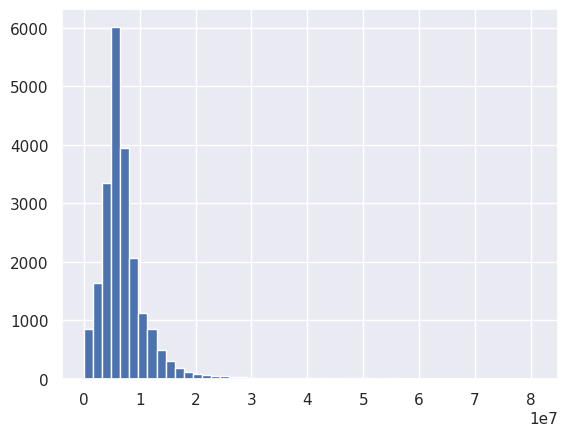

In [ ]:
target_name = 'price_doc'
df[target_name].hist(bins=50)

In [ ]:
df[target_name].describe()

count    2.132900e+04
mean     7.117599e+06
std      4.706342e+06
min      1.000000e+05
25%      4.745995e+06
50%      6.255454e+06
75%      8.300000e+06
max      8.077744e+07
Name: price_doc, dtype: float64

In [ ]:
df = df[
    (df[target_name] <= df[target_name].quantile(0.95))
    & (df[target_name] >= df[target_name].quantile(0.05))
]

<Axes: >

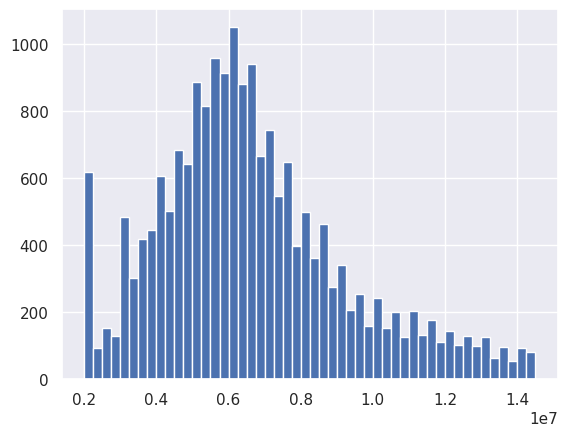

In [ ]:
target_name = 'price_doc'
df[target_name].hist(bins=50)

Видим, что распределение стало ближе к нормальному, однако в этом случае мы теряем часть наблюдений. Дальнейший анализ и проверки показали, что такое урезание выборки ухудшает результат, так что мы отказались от него

##full_sq

<Axes: >

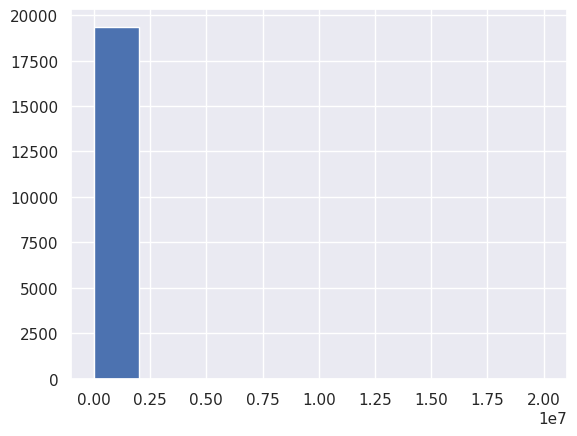

In [ ]:
df['build_year'].hist()

In [ ]:
df['full_sq'].describe()

count    19370.000000
mean        52.106970
std         42.655775
min          0.000000
25%         38.000000
50%         48.000000
75%         61.000000
max       5326.000000
Name: full_sq, dtype: float64

In [ ]:
full_sq= df['full_sq'] > 634
nul=df['full_sq']==0
mean_sq = df['full_sq'].mean()
df.loc[full_sq, 'full_sq'] = mean_sq
df.loc[nul, 'full_sq'] = 1
df

<ipython-input-106-0107725dae1d>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '52.106969540526585' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[full_sq, 'full_sq'] = mean_sq


full_sq  floor  build_year  num_room  kitch_sq  state  product_type  \
0         43.0   24.0      2014.0       1.0      10.0    1.0             1   
1         66.0    3.0      1979.0       3.0      10.0    3.0             0   
3         45.0    7.0      1970.0       2.0       6.0    2.0             0   
4         43.0    4.0      1968.0       2.0       6.0    2.0             0   
6         28.0    4.0      1979.0       1.0       1.0    2.0             1   
...        ...    ...         ...       ...       ...    ...           ...   
21324     56.0   19.0      1979.0       2.0       1.0    1.0             1   
21325     42.0    5.0      1977.0       1.0       8.0    3.0             0   
21326     32.0    3.0      1979.0       2.0       6.0    2.0             0   
21327     43.0    4.0      1969.0       2.0       5.0    2.0             0   
21328     32.0    1.0      1979.0       2.0       6.0    2.0             0   

       raion_popul  indust_part  sport_objects_raion  ...  \
0         8.294300     0.007122                    0  ...   
1        11.314231     0.232205                    4  ...   
3        11.331032     0.428826                    4  ...   
4        11.538769     0.136330                    6  ...   
6         7.842279     0.034656                    0  ...   
...            ...          ...                  ...  ...   
21324    11.655744     0.049637                    6  ...   
21325    11.718817     0.000170                    5  ...   
21326    11.719940     0.000000                    4  ...   
21327    11.331032     0.428826                    4  ...   
21328    11.793198     0.130618                   12  ...   

       cafe_count_1000_price_high  cafe_sum_1500_min_price_avg  \
0                               0                     6.907755   
1                               0                     6.626122   
3                               0                     6.753601   
4                               0                     6.636603   
6                               0                     6.540034   
...                           ...                          ...   
21324                           0                     6.492240   
21325                           0                     6.502295   
21326                           0                     6.572814   
21327                           0                     6.586172   
21328                           0                     6.536692   

       green_part_2000  cafe_sum_2000_min_price_avg  mosque_count_3000  \
0             3.710396                     6.725430                  0   
1             2.764431                     6.479615                  1   
3             1.814825                     6.551080                  0   
4             2.257588                     6.646507                  1   
6             3.801315                     6.526978                  0   
...                ...                          ...                ...   
21324         2.711378                     6.816188                  0   
21325         3.802208                     6.291569                  0   
21326         3.062456                     6.583520                  1   
21327         2.408745                     6.563982                  0   
21328         1.726332                     6.543538                  0   

       prom_part_5000  cafe_sum_5000_min_price_avg  mosque_count_5000  year  \
0            1.803359                     6.616560                  0  2014   
1            2.631169                     6.469948                  1  2013   
3            2.732418                     6.458229                  0  2014   
4            2.020222                     6.634778                  2  2014   
6            0.936093                     7.130899                  0  2015   
...               ...                          ...                ...   ...   
21324        3.297317                     6.536155                  0  2014   
21325        1.442202  

<Axes: >

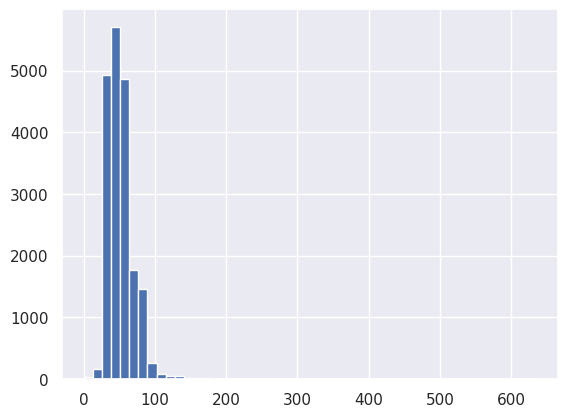

In [ ]:
df['full_sq'].hist(bins=50)

In [ ]:
df['full_sq'].describe()

count    19370.000000
mean        51.799856
std         18.967111
min          1.000000
25%         38.000000
50%         48.000000
75%         61.000000
max        634.000000
Name: full_sq, dtype: float64

Добились того, что максимальные значения сопоставимы с теми, которые являются максимальными в тестовой выборке. Метод сопоставления результатов также показал, что модель лучше всего работает в этом случае

In [ ]:
test_df = pd.read_csv('/content/gdrive/Shareddrives/SHIFT INTENSIV/Task_1/test.csv', index_col=0)

<Axes: >

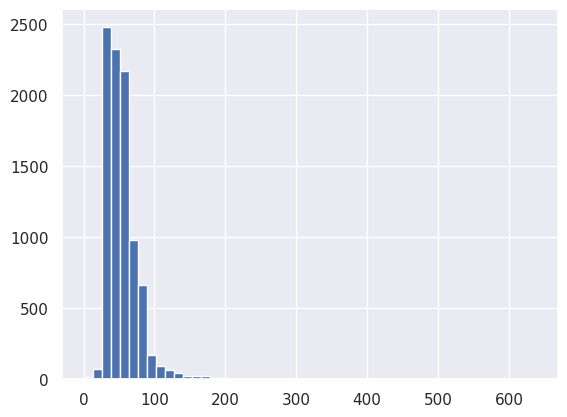

In [ ]:
test_df['full_sq'].hist(bins=50)

In [ ]:
test_df['full_sq'].describe()

count    9142.000000
mean       54.507001
std        24.392465
min         1.000000
25%        39.000000
50%        50.000000
75%        63.000000
max       637.000000
Name: full_sq, dtype: float64

##floor

<Axes: >

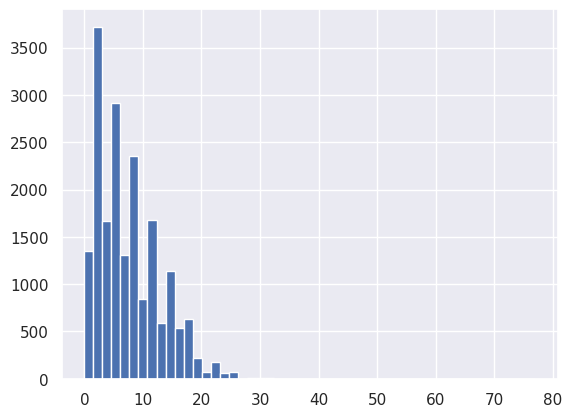

In [ ]:
df['floor'].describe()
df['floor'].hist(bins=50)

<Axes: >

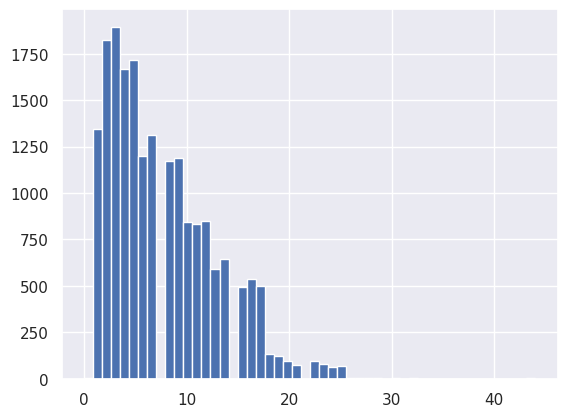

In [ ]:
max_index = df['floor'].idxmax()
mean_sq = df['floor'].mean()
df.loc[max_index, 'floor'] = mean_sq
df['floor'].hist(bins=50)

In [ ]:
df['floor'].describe()

count    19370.000000
mean         7.613351
std          5.230765
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         44.000000
Name: floor, dtype: float64

<Axes: >

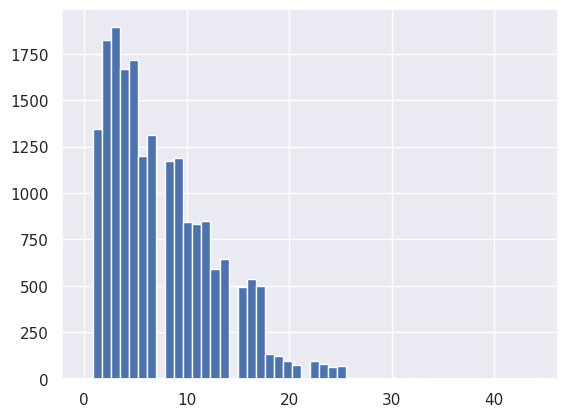

In [ ]:
max_index = df['floor'].idxmax()
mean_sq = df['floor'].mean()
df.loc[max_index, 'floor'] = mean_sq
df['floor'].hist(bins=50)

In [ ]:
df['floor'].describe()

count    19370.000000
mean         7.611473
std          5.224227
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         44.000000
Name: floor, dtype: float64

In [ ]:
test_df['floor'].describe()

count    9142.000000
mean        7.673430
std         5.274204
min         0.000000
25%         3.000000
50%         6.500000
75%        11.000000
max        34.000000
Name: floor, dtype: float64

##num_room

In [ ]:
df['num_room']

0        1.0
1        3.0
3        2.0
4        2.0
6        1.0
        ... 
21324    2.0
21325    1.0
21326    2.0
21327    2.0
21328    2.0
Name: num_room, Length: 19370, dtype: float64

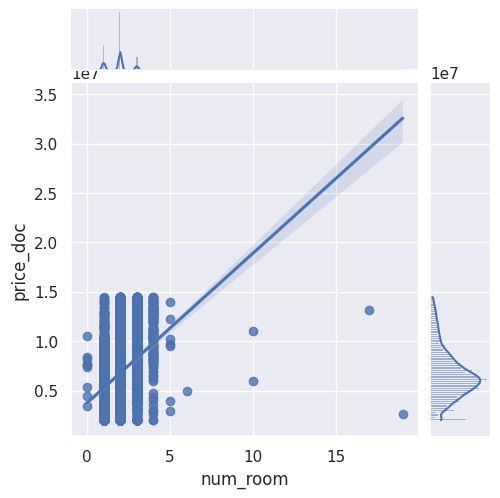

In [ ]:
grid = sns.jointplot(data=df, x='num_room', y='price_doc', kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

Видим, что цена квартир с огромным количеством комнат не больше, чем цена квартир с нормальным числом комнат, что может свидетельствовать о том, что аномально высокие значения количества комнат являются выбросами (вероятно, опечатками)

In [ ]:
num_room= df['num_room'] >= 10
median_room = df['num_room'].median()
df.loc[num_room, 'num_room'] = median_room
df

full_sq  floor  build_year  num_room  kitch_sq  state  product_type  \
0         43.0   24.0      2014.0       1.0      10.0    1.0             1   
1         66.0    3.0      1979.0       3.0      10.0    3.0             0   
3         45.0    7.0      1970.0       2.0       6.0    2.0             0   
4         43.0    4.0      1968.0       2.0       6.0    2.0             0   
6         28.0    4.0      1979.0       1.0       1.0    2.0             1   
...        ...    ...         ...       ...       ...    ...           ...   
21324     56.0   19.0      1979.0       2.0       1.0    1.0             1   
21325     42.0    5.0      1977.0       1.0       8.0    3.0             0   
21326     32.0    3.0      1979.0       2.0       6.0    2.0             0   
21327     43.0    4.0      1969.0       2.0       5.0    2.0             0   
21328     32.0    1.0      1979.0       2.0       6.0    2.0             0   

       raion_popul  indust_part  sport_objects_raion  ...  \
0         8.294300     0.007122                    0  ...   
1        11.314231     0.232205                    4  ...   
3        11.331032     0.428826                    4  ...   
4        11.538769     0.136330                    6  ...   
6         7.842279     0.034656                    0  ...   
...            ...          ...                  ...  ...   
21324    11.655744     0.049637                    6  ...   
21325    11.718817     0.000170                    5  ...   
21326    11.719940     0.000000                    4  ...   
21327    11.331032     0.428826                    4  ...   
21328    11.793198     0.130618                   12  ...   

       cafe_count_1000_price_high  cafe_sum_1500_min_price_avg  \
0                               0                     6.907755   
1                               0                     6.626122   
3                               0                     6.753601   
4                               0                     6.636603   
6                               0                     6.540034   
...                           ...                          ...   
21324                           0                     6.492240   
21325                           0                     6.502295   
21326                           0                     6.572814   
21327                           0                     6.586172   
21328                           0                     6.536692   

       green_part_2000  cafe_sum_2000_min_price_avg  mosque_count_3000  \
0             3.710396                     6.725430                  0   
1             2.764431                     6.479615                  1   
3             1.814825                     6.551080                  0   
4             2.257588                     6.646507                  1   
6             3.801315                     6.526978                  0   
...                ...                          ...                ...   
21324         2.711378                     6.816188                  0   
21325         3.802208                     6.291569                  0   
21326         3.062456                     6.583520                  1   
21327         2.408745                     6.563982                  0   
21328         1.726332                     6.543538                  0   

       prom_part_5000  cafe_sum_5000_min_price_avg  mosque_count_5000  year  \
0            1.803359                     6.616560                  0  2014   
1            2.631169                     6.469948                  1  2013   
3            2.732418                     6.458229                  0  2014   
4            2.020222                     6.634778                  2  2014   
6            0.936093                     7.130899                  0  2015   
...               ...                          ...                ...   ...   
21324        3.297317                     6.536155                  0  2014   
21325        1.442202  

Заменили аномально высокие значения медианой (так как среднее в данном случае получилось бы нецелым, что противоречит смыслу признака)

In [ ]:
df['num_room'].describe()

count    19370.000000
mean         1.895044
std          0.651278
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: num_room, dtype: float64

In [ ]:
test_df['num_room'].describe()

count    9142.000000
mean        1.937760
std         0.698787
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         9.000000
Name: num_room, dtype: float64

<Axes: >

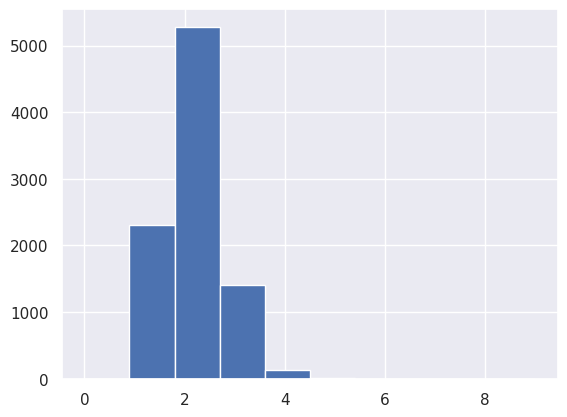

In [ ]:
test_df['num_room'].hist()

In [ ]:
df['state'].unique()

array([ 1.,  3.,  2.,  4., 33.])

##kitch_sq

In [ ]:
df['kitch_sq'].describe()

count    19370.000000
mean         6.050026
std         20.575720
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max       2013.000000
Name: kitch_sq, dtype: float64

In [ ]:
df['kitch_sq'].quantile(0.99)

13.0

<Axes: >

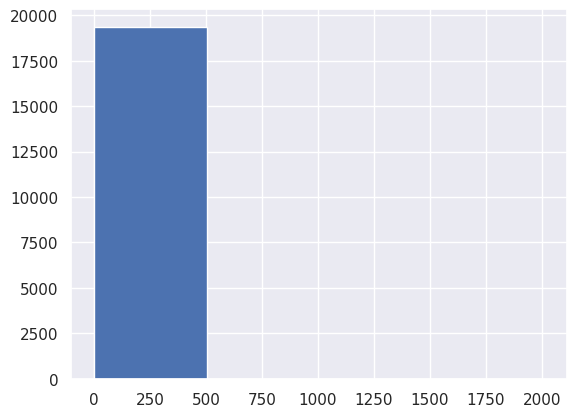

In [ ]:
df['kitch_sq'].hist(bins=4)

In [ ]:
kitch_sq=df[df['kitch_sq'] > df['kitch_sq'].quantile(0.99)]

In [ ]:
# max_index = df['kitch_sq'].idxmax()
# mean_sq = df['kitch_sq'].mean()
# df.loc[max_index, 'kitch_sq'] = mean_sq
# df['kitch_sq'].hist(bins=50)

In [ ]:
df['kitch_sq'].describe()

count    19370.000000
mean         6.050026
std         20.575720
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max       2013.000000
Name: kitch_sq, dtype: float64

In [ ]:
test_df['kitch_sq'].describe()

count    9142.000000
mean        6.231131
std        22.355353
min         0.000000
25%         5.000000
50%         6.000000
75%         8.000000
max      2014.000000
Name: kitch_sq, dtype: float64

In [ ]:
test_df['kitch_sq'].quantile(0.99)

15.0

In [ ]:
test_df[test_df['kitch_sq'] > 15]

full_sq  floor  build_year  num_room  kitch_sq  state  product_type  \
230        67    6.0      2014.0       2.0      16.0    1.0             0   
254        62    1.0      2014.0       1.0      62.0    1.0             1   
289        69   17.0      2012.0       3.0      19.0    1.0             1   
290        87    5.0      2013.0       2.0      20.0    1.0             0   
296        43    3.0      2014.0       1.0    2014.0    1.0             1   
...       ...    ...         ...       ...       ...    ...           ...   
8527      134    5.0      2012.0       3.0      19.0    1.0             0   
8775       57    5.0      2006.0       1.0      16.0    3.0             0   
8778      117    6.0      2002.0       3.0      17.0    1.0             0   
8922       54   25.0      2015.0       2.0      54.0    1.0             1   
8973      138    3.0      2013.0       1.0      42.0    4.0             0   

      raion_popul  indust_part  sport_objects_raion  ...  \
230      9.164611     0.072158                    1  ...   
254      8.342602     0.014058                    0  ...   
289     11.364495     0.122190                    6  ...   
290     11.685559     0.309479                    7  ...   
296      9.164611     0.072158                    1  ...   
...           ...          ...                  ...  ...   
8527     9.164611     0.072158                    1  ...   
8775    11.200240     0.092291                    3  ...   
8778     9.959632     0.000000                    7  ...   
8922    12.092193     0.069753                   17  ...   
8973     8.927712     0.014073                    0  ...   

      cafe_sum_1000_min_price_avg  cafe_count_1000_price_high  \
230                      6.214608                           0   
254                      6.506128                           0   
289                      6.415277                           0   
290                      7.056175                           0   
296                      6.214608                           0   
...                           ...                         ...   
8527                     7.824046                           0   
8775                     6.733402                           0   
8778                     6.629548                           0   
8922                     6.384030                           0   
8973                     6.506128                           0   

      cafe_sum_1500_min_price_avg  green_part_2000  \
230                      6.214608         3.066657   
254                      6.540034         3.776661   
289                      6.428186         2.318458   
290                      7.078097         3.551053   
296                      6.214608         3.330059   
...                           ...              ...   
8527                     7.680947         2.941804   
8775                     6.902984         2.090629   
8778                     6.754989         3.325396   
8922                     6.574615         3.239462   
8973                     6.540034         3.828207   

      cafe_sum_2000_min_price_avg  mosque_count_3000  prom_part_5000  \
230                      7.313220                  0        1.945910   
254                      6.526978                  0        0.955511   
289                      6.411523                  0        2.169054   
290                      6.924288                  1        2.273156   
296                      6.214608                  0        2.154085   
...                           ...                ...             ...   
8527                     7.680947                  0        1.795087   
8775                     6.861889                  0        3.087399   
8778                     6.697688                  0        0.678034   
8922                     6.597596                  0        1.568616   
8973                     6.526978                  0        1.220830   

      cafe_sum_5000_min_price_avg  mosque_count_5000  year  
230 

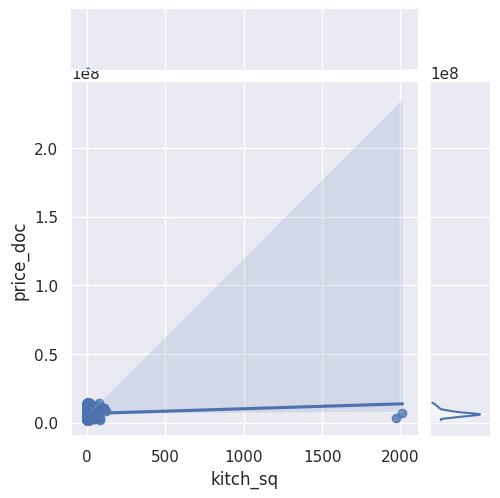

In [ ]:
grid = sns.jointplot(data=df, x='kitch_sq', y='price_doc', kind='reg')
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()

##state

In [ ]:
df['state'].describe()
df['state'] = df['state'].astype(int)
state=df[df['state'] == 33]
print(state)
df = df.loc[df['state'] != 33]
df['state'].describe()

       full_sq  floor  build_year  num_room  kitch_sq  state  product_type  \
17850     37.0    8.0  20052009.0       1.0       9.0     33             0   

       raion_popul  indust_part  sport_objects_raion  ...  \
17850    11.538769      0.13633                    6  ...   

       cafe_count_1000_price_high  cafe_sum_1500_min_price_avg  \
17850                           0                     6.607798   

       green_part_2000  cafe_sum_2000_min_price_avg  mosque_count_3000  \
17850         2.182675                      6.65152                  1   

       prom_part_5000  cafe_sum_5000_min_price_avg  mosque_count_5000  year  \
17850        2.273156                     6.642396                  2  2013   

       price_doc  
17850    9000000  

[1 rows x 51 columns]


<ipython-input-135-7ce9dcf2a262>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['state'] = df['state'].astype(int)


count    19369.000000
mean         2.045433
std          0.621288
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: state, dtype: float64

Видим, что имеется всего одно наблюдение со значением 33, поэтому мы удалили его из выборки

#Проверяем зависимости между признаками

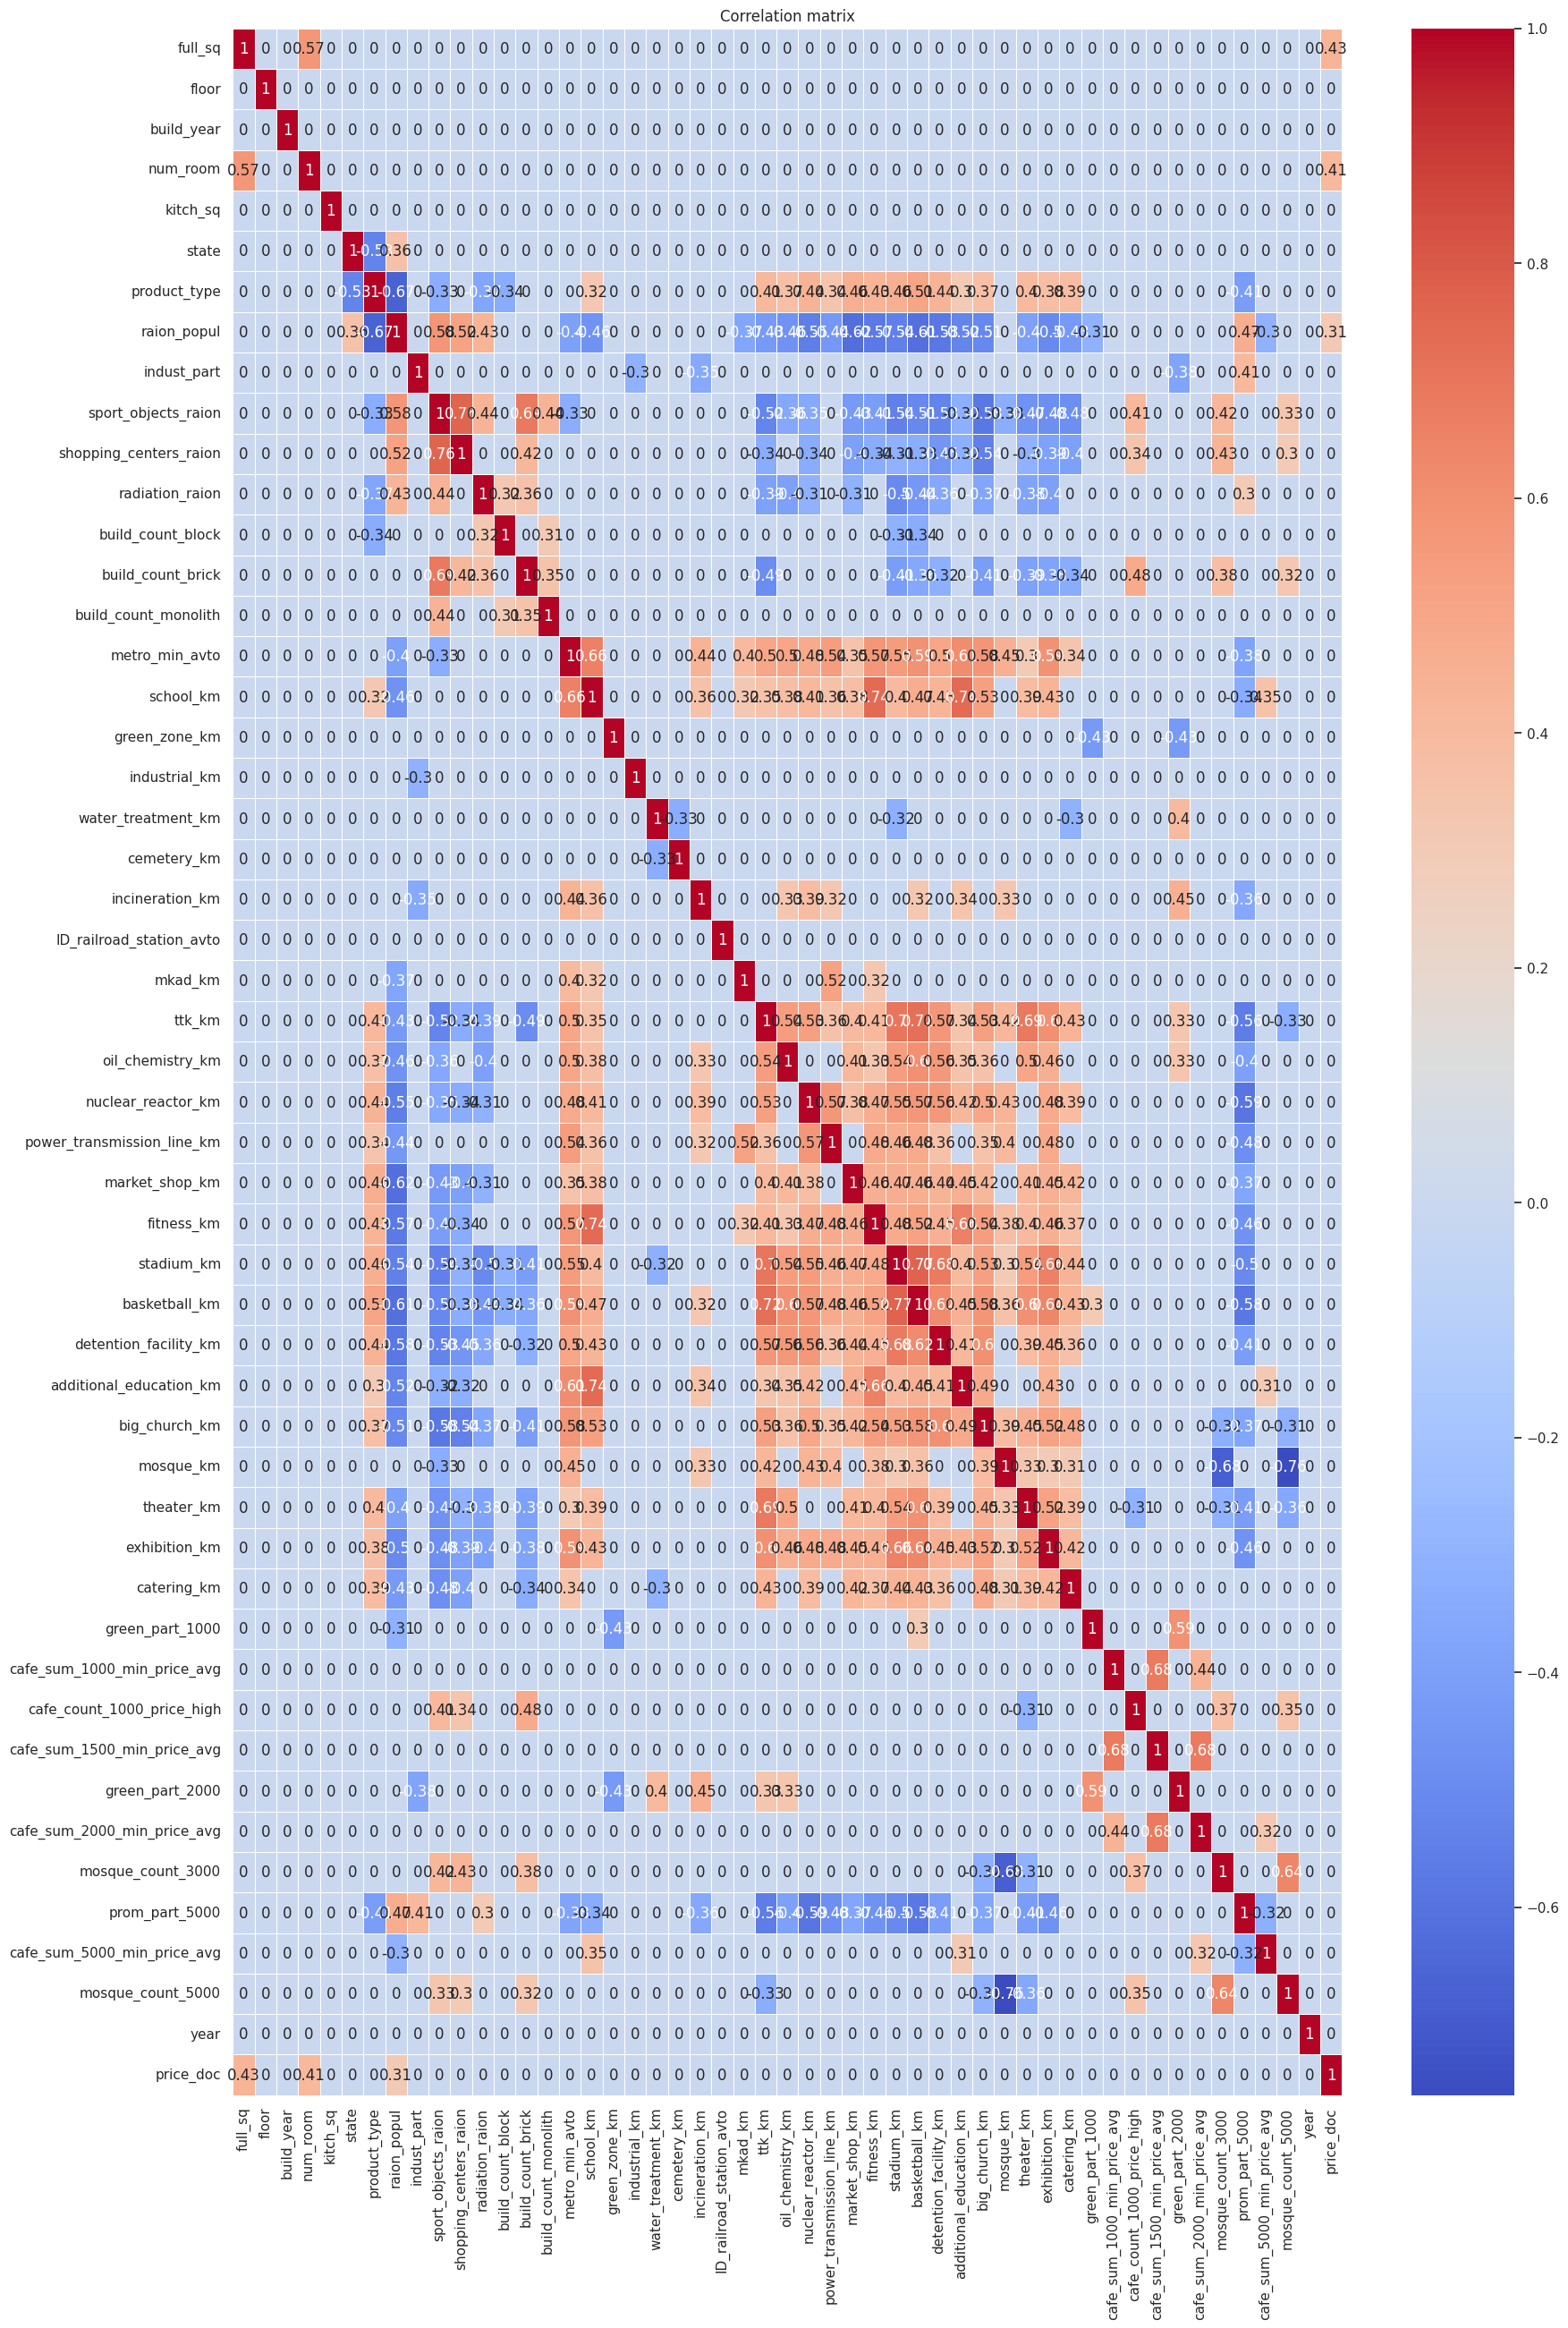

In [ ]:
plt.figure(figsize = (20,30))

sns.set(font_scale=1)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Видим, что многие принзнаки сильно взаимосвязаны. Например, чем меньше расстояние до различных объектов (баскетбольной площадки, супермаркета, фитнес центра), тем выше популярность района

In [ ]:
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            high_corr_pairs.append((colname_i, colname_j, corr_matrix.iloc[i, j]))

# Вывести пары столбцов с корреляцией выше 0.7
for pair in high_corr_pairs:
    print(f"Корреляция между {pair[0]} и {pair[1]}: {pair[2]:.2f}")

Корреляция между shopping_centers_raion и sport_objects_raion: 0.76
Корреляция между fitness_km и school_km: 0.74
Корреляция между basketball_km и ttk_km: 0.72
Корреляция между basketball_km и stadium_km: 0.77
Корреляция между additional_education_km и school_km: 0.74
Корреляция между mosque_count_5000 и mosque_km: -0.76


 shopping_centers_raion и sport_objects_raion мы переведем позже в категориальные признаки. Остальные зависимости объясняются концентрацией объектов в районах (часто все важные объекты расположены, например, ближе к центру, поэтому, чем больше расстояние до, например, баскетбольной площадки, тем больше оно и до стадиона). Обратная корреляция между числом мечетей в радиусе 5000 км и расстоянием до мечети объясняется смыслом признаков

Первой нашей идеей

Заметив такую взаимосвязь, мы решили пробовать объединять различные объекты в одну фичу (например, все спортивные объекты)

#Генерация новых признаков

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19369 entries, 0 to 21328
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      19369 non-null  float64
 1   floor                        19369 non-null  float64
 2   build_year                   19369 non-null  float64
 3   num_room                     19369 non-null  float64
 4   kitch_sq                     19369 non-null  float64
 5   state                        19369 non-null  int64  
 6   product_type                 19369 non-null  int64  
 7   raion_popul                  19369 non-null  float64
 8   indust_part                  19369 non-null  float64
 9   sport_objects_raion          19369 non-null  int64  
 10  shopping_centers_raion       19369 non-null  int64  
 11  radiation_raion              19369 non-null  int64  
 12  build_count_block            19369 non-null  float64
 13  build_count_brick    

Заметим, что в датасете есть такие признаки, как расстояние до различного рода спортивных объектов: fitness_km, stadium_km, basketball_km. Мы объединили их в одну фичу, которая отражает среднее растояние до спортивного объекта

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X['sport_mean_km'] = X[['fitness_km', 'stadium_km', 'basketball_km']].mean(axis=1)
old_sport = ['fitness_km', 'stadium_km', 'basketball_km']
X = X.drop(columns=old_sport)
X[target_name] = y
df=X.copy()

In [ ]:
def build_year_to_build_type(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X['build_type'] = ''

    X.loc[(X['build_year'] <= 1957), 'build_type'] = 'stal'
    X.loc[(X['build_year'] > 1957) & (X['build_year'] <= 1974), 'build_type'] = 'hrush'
    X.loc[(X['build_year'] > 1974) & (X['build_year'] <= 1985), 'build_type'] = 'brezh'
    X.loc[X['build_year'] > 1985, 'build_type'] = 'modern'

    X = pd.concat([X, y], axis=1)

    X.drop(columns='build_year')

    return X
df=build_year_to_build_type(df)
df=df.drop(columns='build_year')

Преобразовали признак build_year в новый признак build_type: разделили выборку на временные периоды. Далее в catboost признак будет передан как категориальный<br>
Мы также пробовали добавить новую категорию для неопределенных дат до 1957 года, включаюую также выбросы и нули, что ухудшило конечный результат

In [ ]:
df['state'] = df['state'].astype(str)

Признак state мы преобразовали в категориальный

In [ ]:
df1=df.iloc[:,:-1]

In [ ]:
df

full_sq  floor  num_room  kitch_sq state  product_type  raion_popul  \
0         43.0   24.0       1.0      10.0     1             1     8.294300   
1         66.0    3.0       3.0      10.0     3             0    11.314231   
3         45.0    7.0       2.0       6.0     2             0    11.331032   
4         43.0    4.0       2.0       6.0     2             0    11.538769   
6         28.0    4.0       1.0       1.0     2             1     7.842279   
...        ...    ...       ...       ...   ...           ...          ...   
21324     56.0   19.0       2.0       1.0     1             1    11.655744   
21325     42.0    5.0       1.0       8.0     3             0    11.718817   
21326     32.0    3.0       2.0       6.0     2             0    11.719940   
21327     43.0    4.0       2.0       5.0     2             0    11.331032   
21328     32.0    1.0       2.0       6.0     2             0    11.793198   

       indust_part  sport_objects_raion  shopping_centers_raion  ...  \
0         0.007122                    0                       1  ...   
1         0.232205                    4                       3  ...   
3         0.428826                    4                       2  ...   
4         0.136330                    6                       6  ...   
6         0.034656                    0                       0  ...   
...            ...                  ...                     ...  ...   
21324     0.049637                    6                       3  ...   
21325     0.000170                    5                       1  ...   
21326     0.000000                    4                       2  ...   
21327     0.428826                    4                       2  ...   
21328     0.130618                   12                       9  ...   

       green_part_2000  cafe_sum_2000_min_price_avg  mosque_count_3000  \
0             3.710396                     6.725430                  0   
1             2.764431                     6.479615                  1   
3             1.814825                     6.551080                  0   
4             2.257588                     6.646507                  1   
6             3.801315                     6.526978                  0   
...                ...                          ...                ...   
21324         2.711378                     6.816188                  0   
21325         3.802208                     6.291569                  0   
21326         3.062456                     6.583520                  1   
21327         2.408745                     6.563982                  0   
21328         1.726332                     6.543538                  0   

       prom_part_5000  cafe_sum_5000_min_price_avg  mosque_count_5000  year  \
0            1.803359                     6.616560                  0  2014   
1            2.631169                     6.469948                  1  2013   
3            2.732418                     6.458229                  0  2014   
4            2.020222                     6.634778                  2  2014   
6            0.936093                     7.130899                  0  2015   
...               ...                          ...                ...   ...   
21324        3.297317                     6.536155                  0  2014   
21325        1.442202                     6.487684                  0  2014   
21326        2.733718                     6.573904                  2  2011   
21327        3.034953                     6.476311                  0  2013   
21328        2.204972                     6.817097                  0  2013   

       sport_mean_km  build_type  price_doc  
0           2.273989      modern    5533460  
1           0.811152       brezh    9900000  
3           1.092279       hrush    6500000  
4           0.702929       hrush    8500000  
6           3.773121       brezh    2544340  
...              ...         ...        ...  
21324       0.602424       brezh   10159562  

Мы также пробовали добавить признаки 'not_good_mean_km' и 'culture_km', которые объединяли признаки 'detention_facility_km', 'nuclear_reactor_km', 'oil_chemistry_km', 'incineration_km', 'cemetery_km' и 'big_church_km', 'mosque_km', 'theater_km', 'exhibition_km' соответственно. Однако, это не улучшило модель, RMSE даже стал чуть больше. Поэтому от этих признаков мы отказались

In [ ]:
df[['detention_facility_km', 'nuclear_reactor_km', 'oil_chemistry_km', 'incineration_km', 'cemetery_km']].mean(axis=1)
df['not_good_mean_km']=df[['detention_facility_km', 'nuclear_reactor_km', 'oil_chemistry_km', 'incineration_km', 'cemetery_km']].mean(axis=1)
old_not_good=['detention_facility_km', 'nuclear_reactor_km', 'oil_chemistry_km', 'incineration_km', 'cemetery_km']
df=pd.concat([df1, df[['not_good_mean_km', 'price_doc']]],axis=1)
df=df.drop(columns=old_not_good)
df
df1=df.iloc[:,:-1]

In [ ]:
# df[['big_church_km', 'mosque_km', 'theater_km', 'exhibition_km']].mean(axis=1)
# df['culture_km']=df[['big_church_km', 'mosque_km', 'theater_km', 'exhibition_km']].mean(axis=1)
# old_cult=['big_church_km', 'mosque_km', 'theater_km', 'exhibition_km']
# df=pd.concat([df1, df[['culture_km', 'price_doc']]],axis=1)
# df=df.drop(columns=old_cult)
# df

### Исследуем признаки 'build_count_block', 'build_count_brick', 'build_count_monolith'. Попытаемся выделить кластеры по типам постройки

In [ ]:
df[['build_count_block', 'build_count_brick', 'build_count_monolith']]

build_count_block  build_count_brick  build_count_monolith
0                   42.0               67.0                   6.0
1                   41.0               23.0                   7.0
3                   53.0              114.0                   5.0
4                  130.0               28.0                  18.0
6                   42.0               67.0                   6.0
...                  ...                ...                   ...
21324               83.0               67.0                   4.0
21325               72.0               22.0                   7.0
21326              223.0               45.0                   8.0
21327               53.0              114.0                   5.0
21328               64.0              225.0                   8.0

[19369 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


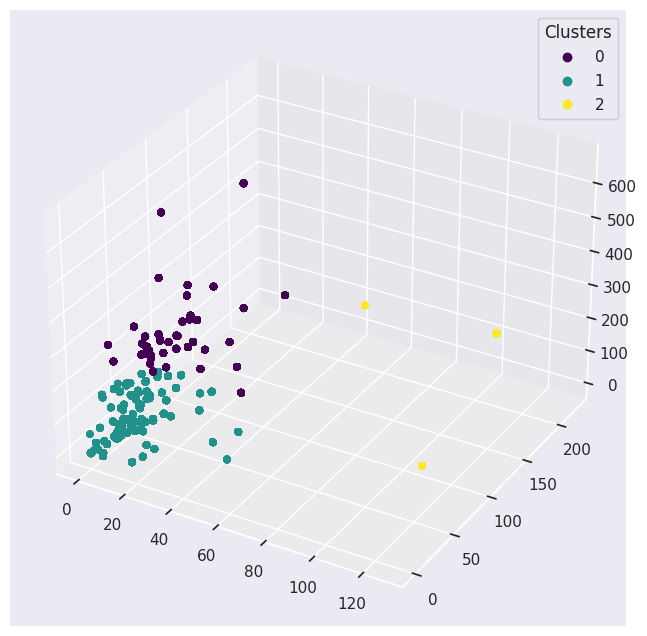

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


construction = ['build_count_monolith', 'build_count_block', 'build_count_brick']
Clust = X[construction]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Clust)


kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X_scaled)


# Визуализация кластеров в 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['build_count_monolith'], X['build_count_block'], X['build_count_brick'], c=X['cluster'], cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

Итоговый результат также оказался хуже

### Пробуем добавить новые признаки: возраст дома и средняя площадь комнат

In [ ]:
def add_mean_room_sq(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X['meam_room_sq'] = X['full_sq'] / X['num_room']

    X = pd.concat([X, y], axis=1)

    return X

In [ ]:
def add_build_age(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X['build_age'] = X['year'] - X['build_year']

    X = pd.concat([X, y], axis=1)

    return X

Это также не дало своих результатов

# Обучение модели.
## Без параметров, без изменений исходного датасета

Мы попробовали несколько моделей, но свой лучший результат показал CatBoost

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
# model2 = DecisionTreeRegressor()
# model2.fit(X_train, y_train)
# y_pred = model2.predict(X_test)

# # Оценка модели
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Вывод результатов
# print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
# print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
# print(f"Коэффициент детерминации (R^2): {r2:.2f}")

In [ ]:
# from sklearn.linear_model import LassoCV
# model = LassoCV()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# # Оценка модели
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Вывод результатов
# print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
# print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
# print(f"Коэффициент детерминации (R^2): {r2:.2f}")

In [ ]:
# from sklearn.linear_model import RidgeCV
# model = RidgeCV()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# # Оценка модели
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Вывод результатов
# print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
# print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
# print(f"Коэффициент детерминации (R^2): {r2:.2f}")

In [ ]:
# from sklearn.linear_model import ElasticNetCV
# model = ElasticNetCV()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# # Оценка модели
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Вывод результатов
# print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
# print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
# print(f"Коэффициент детерминации (R^2): {r2:.2f}")

In [ ]:
!pip install catboost

In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/SHIFT INTENSIV/Task_1/train.csv', index_col=0)

In [ ]:
def print_ratings(y_test, y_pred):
  # Оценка модели
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test, y_pred)

  # Вывод результатов
  print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
  print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
  print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
  print(f"Коэффициент детерминации (R^2): {r2:.2f}")

In [ ]:
from catboost import CatBoostClassifier, Pool, CatBoostRegressor, cv
  # Все столбцы кроме последнего
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   # Только последний столбец

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

train_data = Pool(data=X_train,
                  label=y_train)



In [ ]:
from catboost import cv

cv_dataset = train_data

params = {"loss_function": "RMSE",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=5,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 2434805.237
bestIteration = 985

Training on fold [1/5]

bestTest = 2374155.994
bestIteration = 998

Training on fold [2/5]

bestTest = 2486735.062
bestIteration = 996

Training on fold [3/5]

bestTest = 2523582.912
bestIteration = 997

Training on fold [4/5]

bestTest = 2582391.576
bestIteration = 999



Training on fold [0/5]

bestTest = 2472768.686
bestIteration = 999

Training on fold [1/5]

bestTest = 2453557.539
bestIteration = 991

Training on fold [2/5]

bestTest = 2590115.671
bestIteration = 999

Training on fold [3/5]

bestTest = 2583307.156
bestIteration = 991

Training on fold [4/5]

bestTest = 2666946.915

In [ ]:
scores[scores['test-RMSE-mean']==scores['test-RMSE-mean'].min()]

iterations  test-RMSE-mean  test-RMSE-std  train-RMSE-mean  \
999         999    2.480484e+06   80040.150107     1.864398e+06   

     train-RMSE-std  
999    11842.739435

## Ограничим модель, чтобы не допустить переобучение

In [ ]:
iter = int(scores[scores['test-RMSE-mean']==scores['test-RMSE-mean'].min()]['iterations'])
iter

<ipython-input-161-3cfdb01de511>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  iter = int(scores[scores['test-RMSE-mean']==scores['test-RMSE-mean'].min()]['iterations'])


999

In [ ]:
model = CatBoostRegressor(verbose = False, iterations=iter)

model.fit(train_data)
y_pred = model.predict(X_test)

In [ ]:
print_ratings(y_test, y_pred)

Средняя абсолютная ошибка (MAE): 1329995.43
Среднеквадратичная ошибка (MSE): 6461906594211.25
Корень из среднеквадратичной ошибки (RMSE): 2542028.05
Коэффициент детерминации (R^2): 0.73


# Пробуем ограничить количество признаков

### Первый вариант, который мы попробовали - очистить price_doc от выбросов по IQR и удалить сильно скорелированные признаки. На валидационной выборке результат был отличный, около 1300000, однако на тестовой score показал переобучение и мы отбросили эту идею <br>

### Также мы пробовали ограничить количество признаков по value_importance. Стоит сказать, что все дальнейшие манипуляции с количеством признаков ухудшали наш результат, поэтому мы сосредоточились на добавлении новых фичей


In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/SHIFT INTENSIV/Task_1/train.csv', index_col=0)

<Axes: >

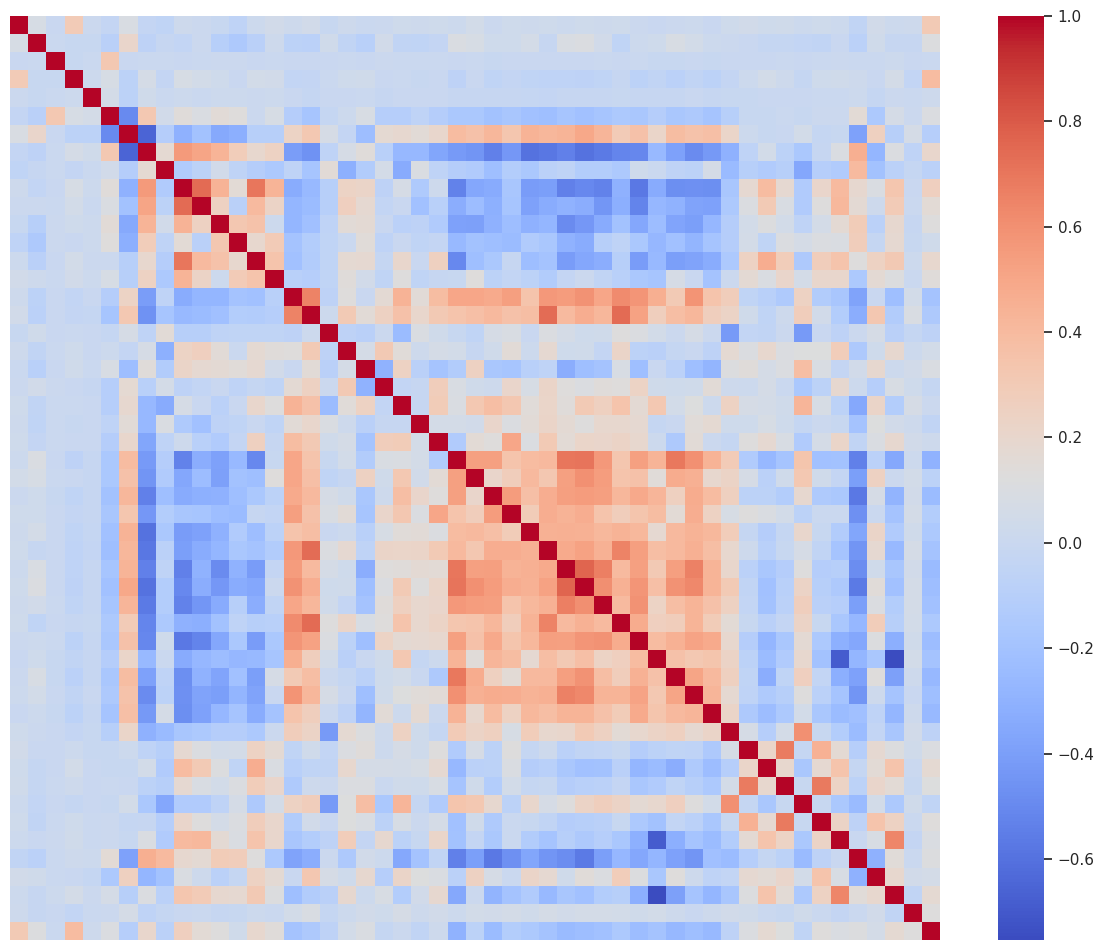

In [ ]:
import seaborn as sns
cor = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(cor, xticklabels=False, yticklabels=False, cmap= 'coolwarm')

In [ ]:
cor = df.corr()['price_doc'].drop('price_doc')
low_cor_features = cor[abs(cor) < 0.1].index.tolist()

print(f"Факторы с корреляцией меньше 0.3 с целевой переменной: {low_cor_features}")

Факторы с корреляцией меньше 0.3 с целевой переменной: ['build_year', 'kitch_sq', 'indust_part', 'build_count_block', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'ID_railroad_station_avto', 'mkad_km', 'oil_chemistry_km', 'green_part_1000', 'green_part_2000', 'mosque_count_3000', 'cafe_sum_5000_min_price_avg']


In [ ]:
len(low_cor_features)

16

In [ ]:
cor = df.corr().abs()
upper = cor.where(np.triu(np.ones(cor.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

print(f"Факторы с коэффициентом корреляции выше 0.9: {to_drop}")

Факторы с коэффициентом корреляции выше 0.9: ['shopping_centers_raion', 'build_count_brick', 'fitness_km', 'basketball_km', 'additional_education_km', 'mosque_count_5000']


In [ ]:
cor = df.corr()['shopping_centers_raion'].drop('shopping_centers_raion')
cor

full_sq                        0.008693
floor                          0.007963
build_year                     0.002742
num_room                       0.051578
kitch_sq                       0.006038
state                          0.096883
product_type                  -0.201685
raion_popul                    0.506811
indust_part                   -0.073828
sport_objects_raion            0.741323
radiation_raion                0.252834
build_count_block             -0.089177
build_count_brick              0.402020
build_count_monolith           0.230294
metro_min_avto                -0.281033
school_km                     -0.242318
green_zone_km                 -0.098021
industrial_km                  0.261867
water_treatment_km             0.181854
cemetery_km                   -0.036981
incineration_km               -0.003669
ID_railroad_station_avto      -0.208244
mkad_km                       -0.090143
ttk_km                        -0.327126
oil_chemistry_km              -0.238776
nuclear_reactor_km            -0.314619
power_transmission_line_km    -0.179236
market_shop_km                -0.390020
fitness_km                    -0.333354
stadium_km                    -0.298585
basketball_km                 -0.322311
detention_facility_km         -0.439129
additional_education_km       -0.315821
big_church_km                 -0.523922
mosque_km                     -0.273382
theater_km                    -0.296436
exhibition_km                 -0.383288
catering_km                   -0.385721
green_part_1000               -0.153719
cafe_sum_1000_min_price_avg    0.107575
cafe_count_1000_price_high     0.307577
cafe_sum_1500_min_price_avg    0.094751
green_part_2000               -0.135237
cafe_sum_2000_min_price_avg    0.123885
mosque_count_3000              0.416857
prom_part_5000                 0.169636
cafe_sum_5000_min_price_avg    0.022980
mosque_count_5000              0.298615
year                           0.001082
price_doc                      0.158095
Name: shopping_centers_raion, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   floor                        21329 non-null  float64
 2   build_year                   21329 non-null  float64
 3   num_room                     21329 non-null  float64
 4   kitch_sq                     21329 non-null  float64
 5   state                        21329 non-null  float64
 6   product_type                 21329 non-null  int64  
 7   raion_popul                  21329 non-null  float64
 8   indust_part                  21329 non-null  float64
 9   sport_objects_raion          21329 non-null  int64  
 10  shopping_centers_raion       21329 non-null  int64  
 11  radiation_raion              21329 non-null  int64  
 12  build_count_block            21329 non-null  float64
 13  build_count_brick    

In [ ]:
df=df.drop(columns=low_cor_features)

In [ ]:
df=df.drop(columns=to_drop)

На валидацинной выборке результат хороший, но на тестовой переобучение даже с кроссвалидацией

In [ ]:
model.get_feature_importance(prettified=True)

Feature Id  Importances
0                       full_sq    39.826777
1                        ttk_km     5.371405
2                    theater_km     3.893772
3                    build_year     3.028781
4                    stadium_km     2.848419
5                          year     2.694262
6            nuclear_reactor_km     2.673026
7                         floor     1.716703
8                         state     1.712412
9                      kitch_sq     1.698887
10                 product_type     1.365916
11          sport_objects_raion     1.342843
12                  indust_part     1.302925
13            build_count_brick     1.298647
14             oil_chemistry_km     1.293130
15                green_zone_km     1.265119
16                exhibition_km     1.228544
17                    school_km     1.224168
18               metro_min_avto     1.207731
19                industrial_km     1.205807
20                  cemetery_km     1.167696
21  cafe_sum_5000_min_price_avg     1.147233
22      additional_education_km     1.078422
23                   fitness_km     1.067507
24                basketball_km     1.065968
25         build_count_monolith     1.062281
26                  catering_km     1.049989
27        detention_facility_km     0.978358
28                     num_room     0.931978
29   power_transmission_line_km     0.922581
30                      mkad_km     0.860822
31                big_church_km     0.821020
32            build_count_block     0.793960
33                    mosque_km     0.790235
34                  raion_popul     0.780604
35       shopping_centers_raion     0.729551
36               market_shop_km     0.650493
37  cafe_sum_1500_min_price_avg     0.622333
38   cafe_count_1000_price_high     0.607869
39               prom_part_5000     0.606957
40              green_part_2000     0.594879
41  cafe_sum_2000_min_price_avg     0.553250
42              green_part_1000     0.544882
43              incineration_km     0.538474
44  cafe_sum_1000_min_price_avg     0.529755
45           water_treatment_km     0.513318
46            mosque_count_3000     0.267970
47     ID_railroad_station_avto     0.262327
48            mosque_count_5000     0.224997
49              radiation_raion     0.035019

In [ ]:
feauteres=model.get_feature_importance(prettified=True)
important_feauteres=feauteres['Feature Id'].iloc[:9]

In [ ]:
cv_dataset = train_data

params = {"loss_function": "RMSE",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=5,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 2434805.237
bestIteration = 985

Training on fold [1/5]

bestTest = 2374155.994
bestIteration = 998

Training on fold [2/5]

bestTest = 2486735.062
bestIteration = 996

Training on fold [3/5]

bestTest = 2523582.912
bestIteration = 997

Training on fold [4/5]

bestTest = 2582391.576
bestIteration = 999



In [ ]:
train_data = Pool(data=X_train[important_feauteres],
                  label=y_train)


In [ ]:
print_ratings(y_test, y_pred)

Средняя абсолютная ошибка (MAE): 1329995.43
Среднеквадратичная ошибка (MSE): 6461906594211.25
Корень из среднеквадратичной ошибки (RMSE): 2542028.05
Коэффициент детерминации (R^2): 0.73


In [ ]:
scores[scores['test-RMSE-mean']==scores['test-RMSE-mean'].min()]

iterations  test-RMSE-mean  test-RMSE-std  train-RMSE-mean  \
999         999    2.480484e+06   80040.150107     1.864398e+06   

     train-RMSE-std  
999    11842.739435

## Ограничим модель, чтобы не допустить переобучение

In [ ]:
iter = int(scores[scores['test-RMSE-mean']==scores['test-RMSE-mean'].min()]['iterations'])
iter

<ipython-input-179-3cfdb01de511>:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  iter = int(scores[scores['test-RMSE-mean']==scores['test-RMSE-mean'].min()]['iterations'])


999

In [ ]:
model = CatBoostRegressor(verbose = False, iterations=iter)

model.fit(train_data)
y_pred = model.predict(X_test)

In [ ]:
print_ratings(y_test, y_pred)

Средняя абсолютная ошибка (MAE): 1405901.86
Среднеквадратичная ошибка (MSE): 7099007301854.28
Корень из среднеквадратичной ошибки (RMSE): 2664396.24
Коэффициент детерминации (R^2): 0.70


Мы экспериментировали с количеством признаков, но это давало только ухудшения

## Нашим лучшим решением оказалось таким:<br>
1. Оставить все выбросы кроме выброса в категории state
2. Добавить новую фичу build_type и sport_mean

<br> Пробуем тюнинг модели

In [ ]:
def build_year_to_build_type(df):
    X = df.iloc[:, :-1]
    y = df.iloc[:, -1]
    X['build_type'] = ''

    X.loc[(X['build_year'] <= 1957), 'build_type'] = 'stal'
    X.loc[(X['build_year'] > 1957) & (X['build_year'] <= 1974), 'build_type'] = 'hrush'
    X.loc[(X['build_year'] > 1974) & (X['build_year'] <= 1985), 'build_type'] = 'brezh'
    X.loc[X['build_year'] > 1985, 'build_type'] = 'modern'

    X = pd.concat([X, y], axis=1)

    X.drop(columns='build_year')

    return X

In [ ]:
df = pd.read_csv('/content/gdrive/Shareddrives/SHIFT INTENSIV/Task_1/train.csv', index_col=0)

In [ ]:
target_name='price_doc'

In [ ]:
df['state'] = df['state'].astype(str)
df = build_year_to_build_type(df)
df = df.loc[df['state'] != '33.0']


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X['sport_mean_km'] = X[['fitness_km', 'stadium_km', 'basketball_km']].mean(axis=1)
old_sport = ['fitness_km', 'stadium_km', 'basketball_km']
X = X.drop(columns=old_sport)
X[target_name] = y
df=X.copy()

In [ ]:
  # Все столбцы кроме последнего
X = df.iloc[:, :-1]
y = df.iloc[:, -1]   # Только последний столбец

In [ ]:
X

full_sq  floor  build_year  num_room  kitch_sq state  product_type  \
0           43   24.0      2014.0       1.0      10.0   1.0             1   
1           66    3.0      1979.0       3.0      10.0   3.0             0   
2           55    5.0      1979.0       2.0       6.0   2.0             0   
3           45    7.0      1970.0       2.0       6.0   2.0             0   
4           43    4.0      1968.0       2.0       6.0   2.0             0   
...        ...    ...         ...       ...       ...   ...           ...   
21324       56   19.0      1979.0       2.0       1.0   1.0             1   
21325       42    5.0      1977.0       1.0       8.0   3.0             0   
21326       32    3.0      1979.0       2.0       6.0   2.0             0   
21327       43    4.0      1969.0       2.0       5.0   2.0             0   
21328       32    1.0      1979.0       2.0       6.0   2.0             0   

       raion_popul  indust_part  sport_objects_raion  ...  \
0         8.294300     0.007122                    0  ...   
1        11.314231     0.232205                    4  ...   
2        11.718817     0.000170                    5  ...   
3        11.331032     0.428826                    4  ...   
4        11.538769     0.136330                    6  ...   
...            ...          ...                  ...  ...   
21324    11.655744     0.049637                    6  ...   
21325    11.718817     0.000170                    5  ...   
21326    11.719940     0.000000                    4  ...   
21327    11.331032     0.428826                    4  ...   
21328    11.793198     0.130618                   12  ...   

       cafe_sum_1500_min_price_avg  green_part_2000  \
0                         6.907755         3.710396   
1                         6.626122         2.764431   
2                         6.368753         3.511844   
3                         6.753601         1.814825   
4                         6.636603         2.257588   
...                            ...              ...   
21324                     6.492240         2.711378   
21325                     6.502295         3.802208   
21326                     6.572814         3.062456   
21327                     6.586172         2.408745   
21328                     6.536692         1.726332   

       cafe_sum_2000_min_price_avg  mosque_count_3000  prom_part_5000  \
0                         6.725430                  0        1.803359   
1                         6.479615                  1        2.631169   
2                         6.192138                  0        1.363537   
3                         6.551080                  0        2.732418   
4                         6.646507                  1        2.020222   
...                            ...                ...             ...   
21324                     6.816188                  0        3.297317   
21325                     6.291569                  0        1.442202   
21326                     6.583520                  1        2.733718   
21327                     6.563982                  0        3.034953   
21328                     6.543538                  0        2.204972   

       cafe_sum_5000_min_price_avg  mosque_count_5000  year  build_type  \
0                         6.616560                  0  2014      modern   
1                         6.469948                  1  2013       brezh   
2                         6.462171                  0  2012       brezh   
3                         6.458229                  0  2014       hrush   
4                         6.634778                  2  2014       hrush   
...                            ...                ...   ...         ...   
21324                     6.536155                  0  2014       brezh   
21325                     6.487684                  0  2014       brezh   
21326                     6.573904                  2  2011       brezh   
21327                     6.476311                  0  2013  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((17062, 49), (4266, 49))

## Оптимизация


In [ ]:
# import optuna
# from catboost import CatBoostRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# import numpy as np

# cat_features = [X.columns.get_loc('state'), X.columns.get_loc('build_type')]

# # Определение функции для оптимизации
# def objective(trial):
#     # Определение гиперпараметров для оптимизации
#     iterations = trial.suggest_int('iterations', 300, 1200)
#     depth = trial.suggest_int('depth', 3, 10)
#     learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
#     l2_leaf_reg = trial.suggest_loguniform('l2_leaf_reg', 1e-8, 10.0)
#     bagging_temperature = trial.suggest_loguniform('bagging_temperature', 0.001, 1.0)
#     border_count = trial.suggest_int('border_count', 1, 255)
#     random_strength = trial.suggest_loguniform('random_strength', 1e-9, 10)
#     grow_policy = trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])

#     # Определение модели
#     model = CatBoostRegressor(
#         iterations=iterations,
#         depth=depth,
#         learning_rate=learning_rate,
#         l2_leaf_reg=l2_leaf_reg,
#         bagging_temperature=bagging_temperature,
#         border_count=border_count,
#         random_strength=random_strength,
#         grow_policy=grow_policy,
#         verbose=0,
#         cat_features=cat_features
#     )

#     # Обучение модели
#     model.fit(X, y_train)

#     # Предсказание на валидационных данных
#     preds = model.predict(X_test)
#     rmse = np.sqrt(mean_squared_error(y_test, preds))
#     return rmse

# # Создание и запуск оптимизации
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# print('Best trial:')
# trial = study.best_trial

# print('Value: ', trial.value)

# print('Params: ')
# for key, value in trial.params.items():
#     print(f'    {key}: {value}')

Best trial: <br>
Value:  2523656.2251453563 <br>
Params: <br>
    iterations: 581 <br>
    depth: 4 <br>
    learning_rate: 0.0761904810931757 <br>
    l2_leaf_reg: 0.0010505322936191254 <br>
    bagging_temperature: 0.20223899439227755 <br>
    border_count: 145 <br>
    random_strength: 3.8484617213502337 <br>
    grow_policy: Lossguide <br>

Однако изменение параметров улучшило показатель только на валидационной выборке, на тестовой результат оказался хуже

## Наше лучшее решение оказалось таким:<br>
1. Оставить все выбросы кроме выброса в категории state
2. Добавить новую фичу build_type и sport_mean
3. CatBoostRegressor без параметров

##Ансамблирование

Мы предположили, что использование дополнительно моделей LightGBM и XGBRefressor поможет улучшить результат

Заметим, что именно для ансамбля была проведена большая часть работы с выбросами, так как дополнительные модели более чувствительны к выбросам, чем CatBoost. Также для этого варианта был осуществлен one-hot encoding для категориальных переменных

In [ ]:
df = pd.get_dummies(df, columns=['state'], prefix='state')
df = pd.get_dummies(df, columns=['build_type'], prefix='build_type')

In [ ]:
df

full_sq  floor  build_year  num_room  kitch_sq  product_type  \
0           43   24.0      2014.0       1.0      10.0             1   
1           66    3.0      1979.0       3.0      10.0             0   
2           55    5.0      1979.0       2.0       6.0             0   
3           45    7.0      1970.0       2.0       6.0             0   
4           43    4.0      1968.0       2.0       6.0             0   
...        ...    ...         ...       ...       ...           ...   
21324       56   19.0      1979.0       2.0       1.0             1   
21325       42    5.0      1977.0       1.0       8.0             0   
21326       32    3.0      1979.0       2.0       6.0             0   
21327       43    4.0      1969.0       2.0       5.0             0   
21328       32    1.0      1979.0       2.0       6.0             0   

       raion_popul  indust_part  sport_objects_raion  shopping_centers_raion  \
0         8.294300     0.007122                    0                       1   
1        11.314231     0.232205                    4                       3   
2        11.718817     0.000170                    5                       1   
3        11.331032     0.428826                    4                       2   
4        11.538769     0.136330                    6                       6   
...            ...          ...                  ...                     ...   
21324    11.655744     0.049637                    6                       3   
21325    11.718817     0.000170                    5                       1   
21326    11.719940     0.000000                    4                       2   
21327    11.331032     0.428826                    4                       2   
21328    11.793198     0.130618                   12                       9   

       ...  sport_mean_km  price_doc  state_1.0  state_2.0  state_3.0  \
0      ...       2.273989    5533460       True      False      False   
1      ...       0.811152    9900000      False      False       True   
2      ...       0.829332    1990000      False       True      False   
3      ...       1.092279    6500000      False       True      False   
4      ...       0.702929    8500000      False       True      False   
...    ...            ...        ...        ...        ...        ...   
21324  ...       0.602424   10159562       True      False      False   
21325  ...       0.739001    5100000      False      False       True   
21326  ...       1.344032    4800000      False       True      False   
21327  ...       0.739728    6300000      False       True      False   
21328  ...       1.291019    4800000      False       True      False   

       state_4.0  build_type_brezh  build_type_hrush  build_type_modern  \
0          False             False             False               True   
1          False              True             False              False   
2          False              True             False              False   
3          False             False              True              False   
4          False             False              True              False   
...          ...               ...               ...                ...   
21324      False              True             False              False   
21325      False              True             False              False   
21326      False              True             False              False   
21327      False             False              True              False   
21328      False              True             False              False   

       build_type_stal  
0                False  
1                False  
2                False  
3                False  
4                False  
...                ...  
21324            False  
21325            False  
21326            False  
21327            False  
21328            False  

[21328 rows x 56 columns]

Заранее обученные модели мы  загрузили в формате pickle

In [ ]:
import pickle
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

with open('/content/gdrive/Shareddrives/SHIFT INTENSIV/Task_1/models/model1.pkl', 'rb') as f:
    model1 = pickle.load(f)

with open('/content/gdrive/Shareddrives/SHIFT INTENSIV/Task_1/models/model2.pkl', 'rb') as f:
    model2 = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:46:46] WARNING: /workspace/src/collective/../data/../common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


In [ ]:
X = df.drop('price_doc',axis=1)
y = df['price_doc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cols_when_model_builds = model1.get_booster().feature_names
X_test = X_test[cols_when_model_builds]
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_preds=(y_pred+y_pred1+y_pred2)/3
print_ratings(y_test, y_preds)

Средняя абсолютная ошибка (MAE): 1371865.90
Среднеквадратичная ошибка (MSE): 8052841514985.96
Корень из среднеквадратичной ошибки (RMSE): 2837752.90
Коэффициент детерминации (R^2): 0.66


Видим, что результат не улучшился. Мы также пробовали использовать комбинацию из CatBoost и XGBRegression, однако результат получался тем лучше, чем больше доля CatBoost. Таким образом, мы сделали вывод о том, что модель с использованием одного CatBoost лучше

In [ ]:
pred1=0.7*y_pred+0.3*y_pred1
print_ratings(y_test, pred1)

Средняя абсолютная ошибка (MAE): 1420170.45
Среднеквадратичная ошибка (MSE): 7219834807484.23
Корень из среднеквадратичной ошибки (RMSE): 2686975.03
Коэффициент детерминации (R^2): 0.70
